<a href="https://colab.research.google.com/github/G1ZE3/Streamlit-Sales-Forecasting/blob/main/sale_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np

# Data Collection

https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_excel('/content/drive/MyDrive/Project/store.xls')

In [57]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [58]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [60]:
unique_categories = df['Category'].unique()
unique_categories

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [61]:
furniture = df.loc[df['Category'] == 'Furniture']
office_supplies = df.loc[df['Category'] == 'Office Supplies']
technology = df.loc[df['Category'] == 'Technology']

In [62]:
office_supplies

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [63]:
office_supplies['Order Date'].min(), office_supplies['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

# Data Preprocessing

เอา columns ที่ไม่ต้องการใช้ออก , check missing values, รวม sales ตามวันที่

In [64]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
office_supplies.drop(cols, axis=1, inplace=True)
office_supplies = office_supplies.sort_values('Order Date')
office_supplies.isnull().sum()

<ipython-input-64-c2c09c5e6719>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_supplies.drop(cols, axis=1, inplace=True)


Order Date    0
Sales         0
dtype: int64

In [65]:
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()

In [66]:
office_supplies

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430
...,...,...
1143,2017-12-26,814.594
1144,2017-12-27,13.248
1145,2017-12-28,1091.244
1146,2017-12-29,282.440


# Time Series Decomposition

In [67]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [68]:
office_supplies = office_supplies.set_index('Order Date')
office_supplies.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [69]:
y = office_supplies['Sales'].resample('MS').mean()

In [70]:
y['2017':]

Order Date
2017-01-01     967.013136
2017-02-01     389.882737
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

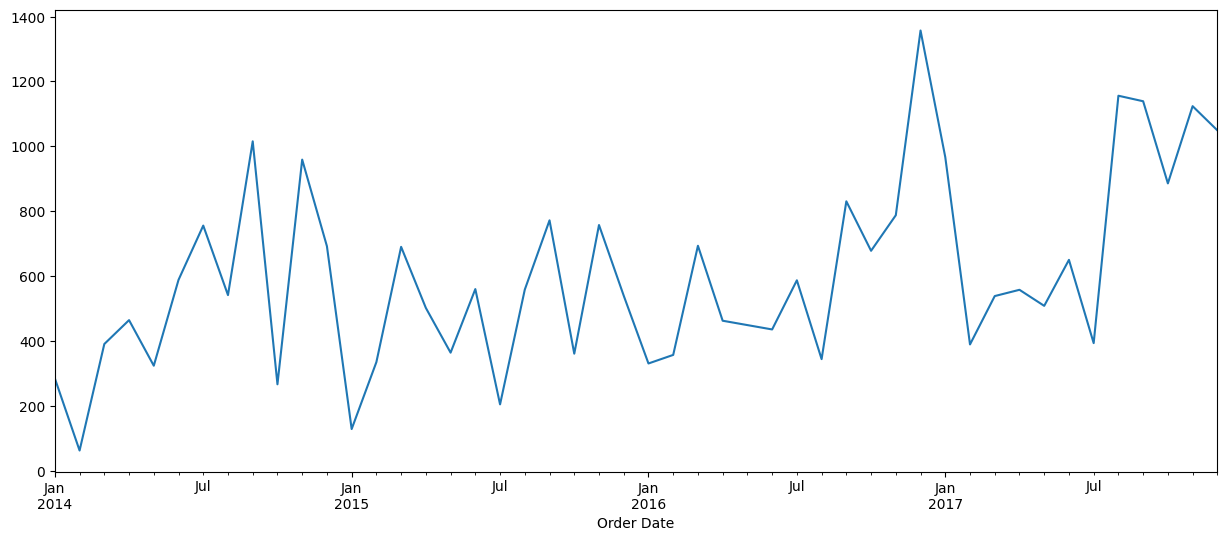

In [71]:
y.plot(figsize=(15, 6))
plt.show()

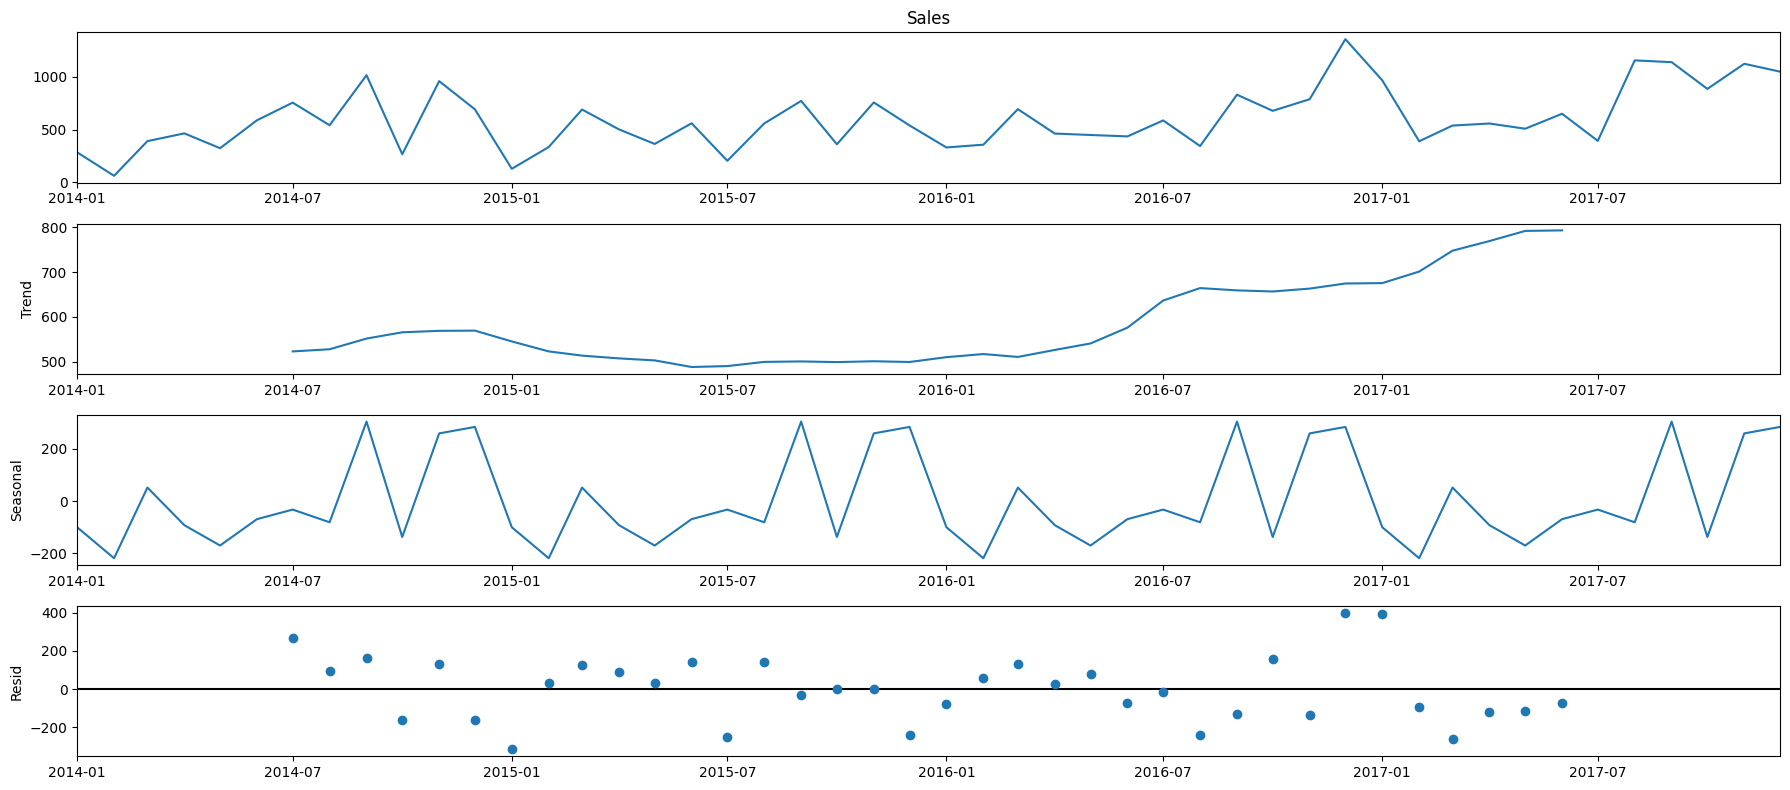

In [72]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# Modeling

In [73]:
import itertools

ARIMA

In [74]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [75]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(e)
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:747.1990404227043
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1433.272583547056
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:500.73353987806166


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:333.71014965107565
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:516.0876543936834


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1620.9322638309955
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:347.44488563489716
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:335.90785733556413
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:702.6891395292504
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2754.6171437439752


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.76014158147524
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:319.86259572792653
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:517.4952646586031
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2594.435008696651


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:345.6922094460113
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:320.84507752681174
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:666.4572045007284


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1706.3491076018545
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:503.0840747554472
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:323.42010400939023
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:500.0109385290892
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1498.9491785350597
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:335.71489594188165
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:322.95954030937514
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:637.3530008828182


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1668.7791086668446
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:473.71539674553776
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:302.48088241054415
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:489.9419970027692


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2635.451686185795
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:330.70615130932293
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:303.7694358446024
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:680.4032716562348
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1414.322015443544


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:501.7031226672368
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:331.4711118142583
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:500.21905344214434


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1423.6040084556962
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:331.0719973254954
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:332.9374884385207
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:651.1768264308319


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2576.1896723561395
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:488.4314196132832
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:317.7740479409585
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:489.25464004457774


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2418.786423170061
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:331.71368022735516


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:318.3418998532165
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:658.0713305703065
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1303.0970165996782


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:494.907679737394
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:321.1048910079109
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:482.80837530249516
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1650.454041437603
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:321.23254698837286


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:321.39217693266494
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:638.7962401173871


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:399.06092911980886
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:475.71388519565306


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:304.2342988745993
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:478.6987301743682
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1758.1259782598306
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:318.20664790842756


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:305.3485156759193



Fitting the ARIMA model

In [76]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1369      0.255      0.536      0.592      -0.363       0.637
ma.L1         -0.8879      0.248     -3.587      0.000      -1.373      -0.403
ar.S.L12      -0.1018      0.693     -0.147      0.883      -1.459       1.256
ma.S.L12      -0.7239      1.889     -0.383      0.701      -4.426       2.978
sigma2      5.363e+04   6.64e+04      0.807      0.419   -7.66e+04    1.84e+05


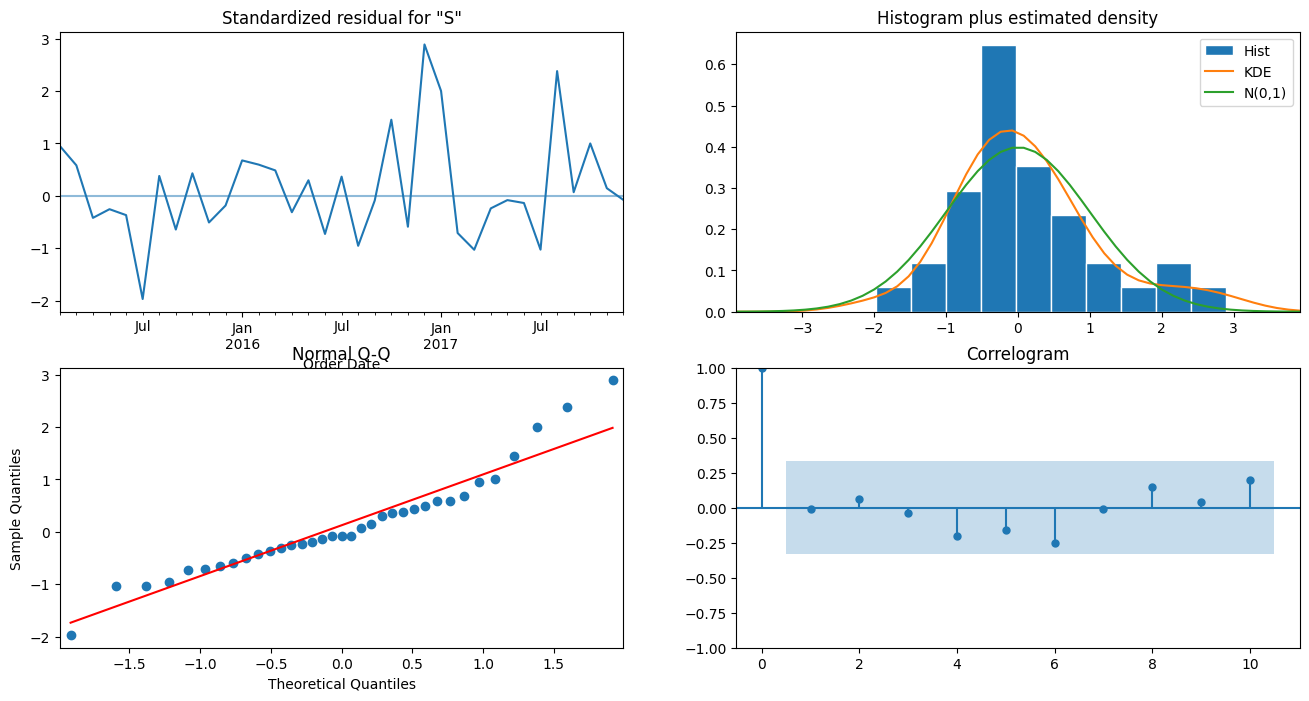

In [77]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

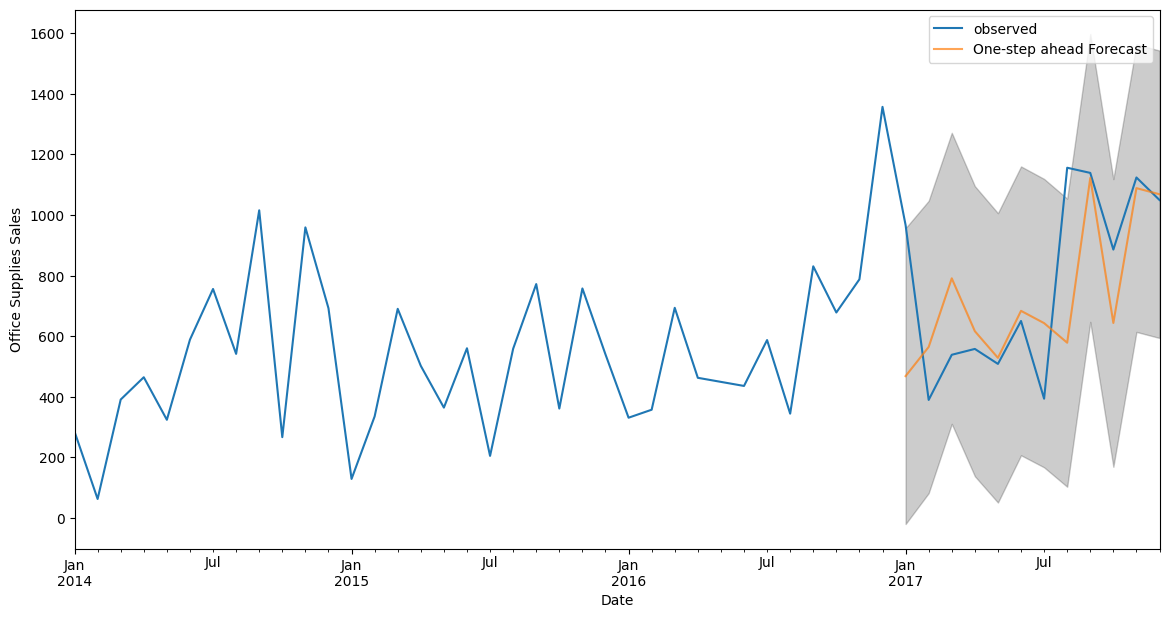

In [78]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

# Model Evaluation

In [79]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 66980.62
The Root Mean Squared Error of our forecasts is 258.81


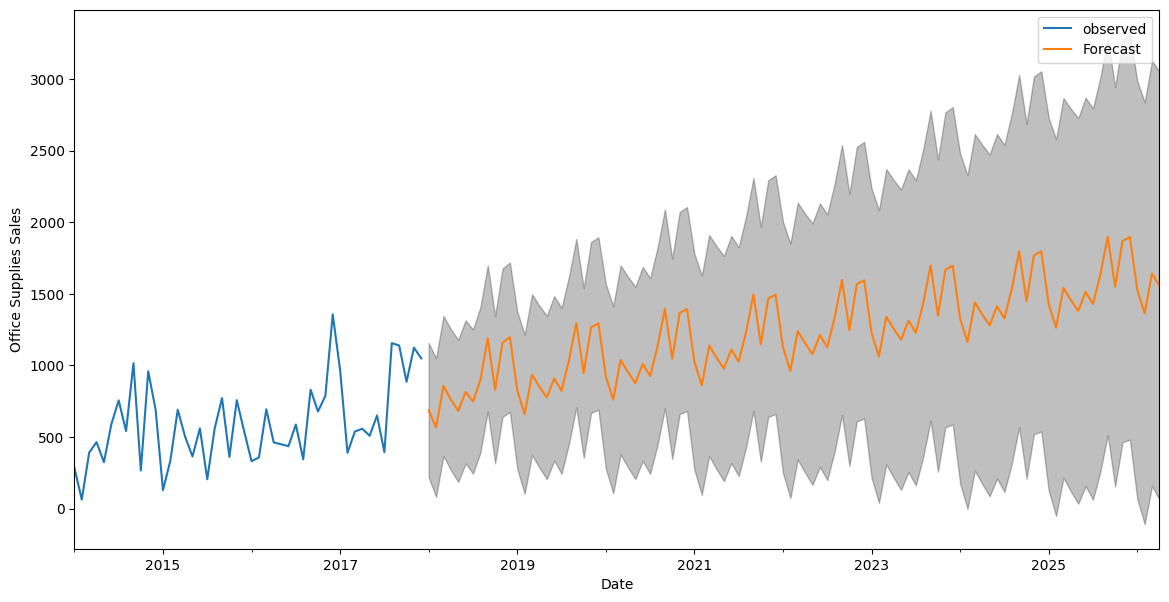

In [80]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

# Furniture vs Office Supplies vs Technology

อย่าลืม run data collection ใหม่

In [81]:
df = pd.read_excel('/content/drive/MyDrive/Project/store.xls')
furniture = df.loc[df['Category'] == 'Furniture']
office_supplies = df.loc[df['Category'] == 'Office Supplies']
technology = df.loc[df['Category'] == 'Technology']

In [82]:
furniture.shape, office_supplies.shape , technology.shape

((2121, 21), (6026, 21), (1847, 21))

In [83]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office_supplies.drop(cols, axis=1, inplace=True)
technology.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office_supplies = office_supplies.sort_values('Order Date')
technology = technology.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office_supplies = office_supplies.set_index('Order Date')
technology = technology.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office_supplies = office_supplies['Sales'].resample('MS').mean()
y_technology = technology['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office_supplies = pd.DataFrame({'Order Date': y_office_supplies.index, 'Sales': y_office_supplies.values})
technology = pd.DataFrame({'Order Date': y_technology.index, 'Sales': y_technology.values})

store = furniture.merge(office_supplies, on='Order Date', how='inner')
store = store.merge(technology, on='Order Date', how='inner')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_supplies_sales', 'Sales': 'technology_sales'}, inplace=True)
store.head()


<ipython-input-83-feb5d22a3f18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture.drop(cols, axis=1, inplace=True)
<ipython-input-83-feb5d22a3f18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_supplies.drop(cols, axis=1, inplace=True)
<ipython-input-83-feb5d22a3f18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  technology.drop(cols, axis=1, inplace=True)


,Order Date,furniture_sales,office_supplies_sales,technology_sales
0,2014-01-01,480.194231,285.357647,449.041429
1,2014-02-01,367.931600,63.042588,229.787143
2,2014-03-01,857.291529,391.176318,2031.948375
3,2014-04-01,567.488357,464.794750,613.028933
4,2014-05-01,432.049188,324.346545,564.698588


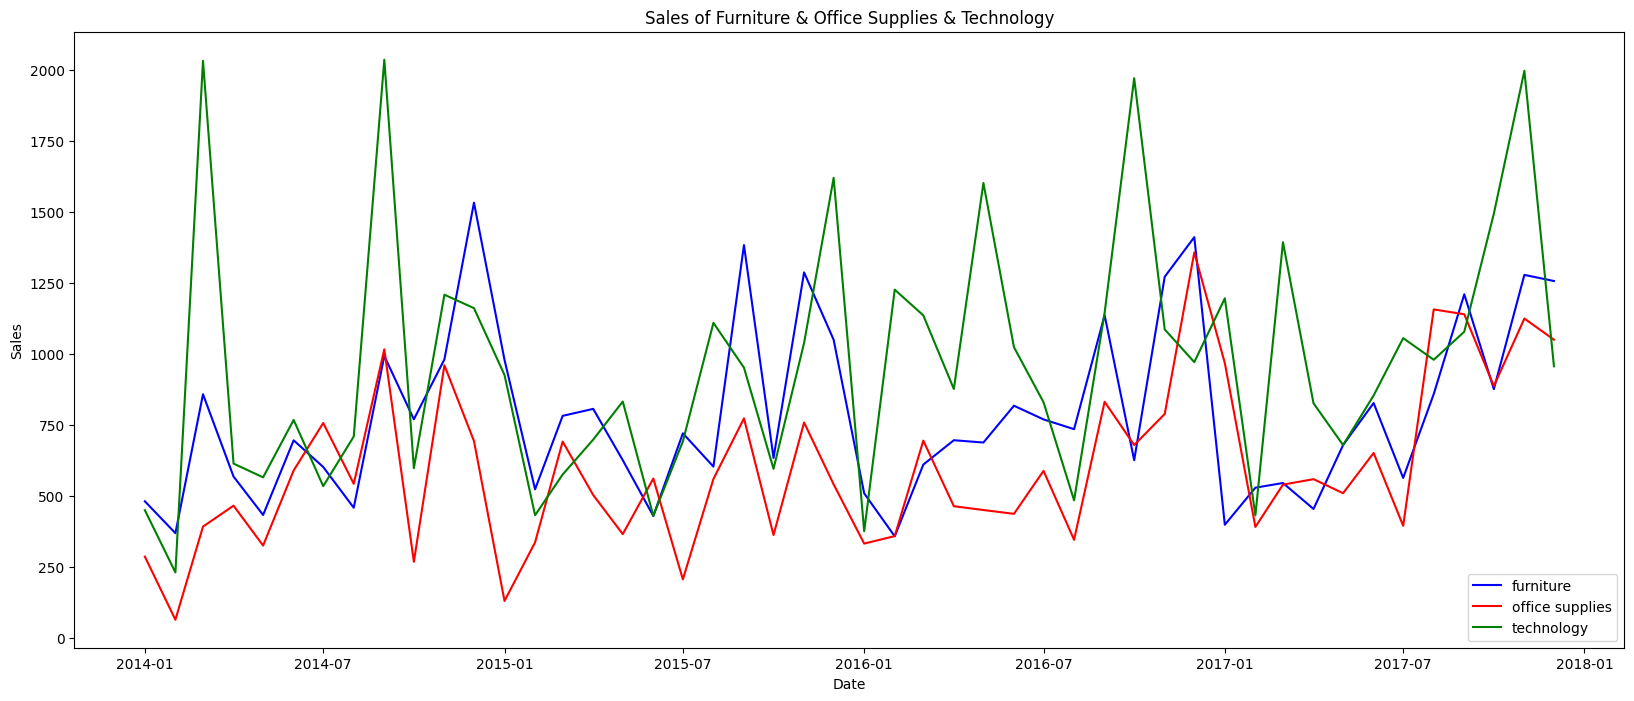

In [84]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_supplies_sales'], 'r-', label = 'office supplies')
plt.plot(store['Order Date'], store['technology_sales'], 'g-', label = 'technology')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture & Office Supplies & Technology')
plt.legend();

Time Series Modeling

In [85]:
from prophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office_supplies = office_supplies.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_supplies_model = Prophet(interval_width=0.95)
office_supplies_model.fit(office_supplies)
technology = technology.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
technology_model = Prophet(interval_width=0.95)
technology_model.fit(technology)

furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_supplies_forecast = office_supplies_model.make_future_dataframe(periods=36, freq='MS')
office_supplies_forecast = office_supplies_model.predict(office_supplies_forecast)
technology_forecast = technology_model.make_future_dataframe(periods=36, freq='MS')
technology_forecast = technology_model.predict(technology_forecast)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptq1a62x5/0_nxbdgl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptq1a62x5/9awmu6g_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10983', 'data', 'file=/tmp/tmptq1a62x5/0_nxbdgl.json', 'init=/tmp/tmptq1a62x5/9awmu6g_.json', 'output', 'file=/tmp/tmptq1a62x5/prophet_modelcrnortj8/prophet_model-20230615060157.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:01:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:01:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

<Figure size 1800x600 with 0 Axes>

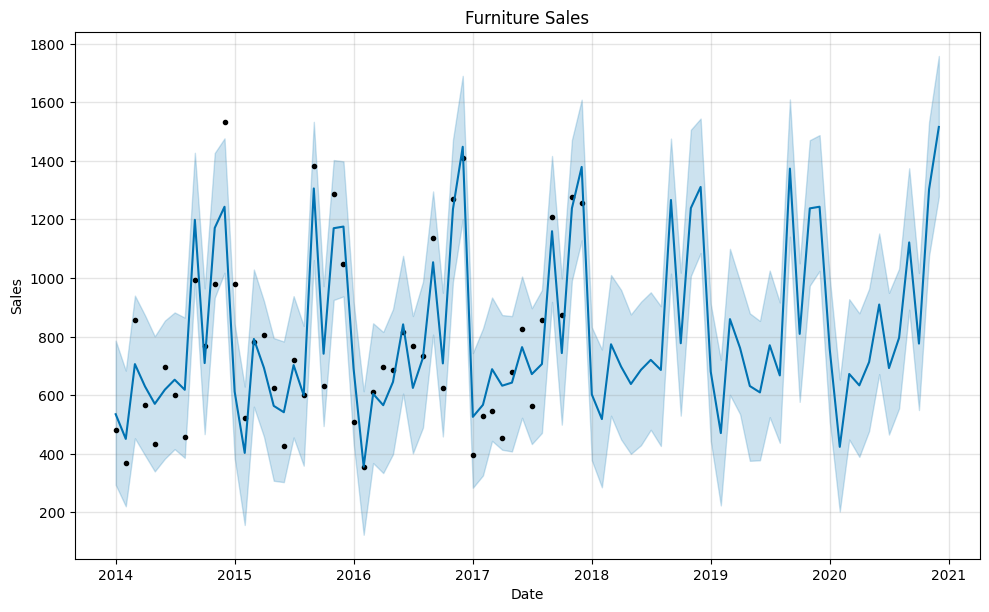

In [86]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

<Figure size 1800x600 with 0 Axes>

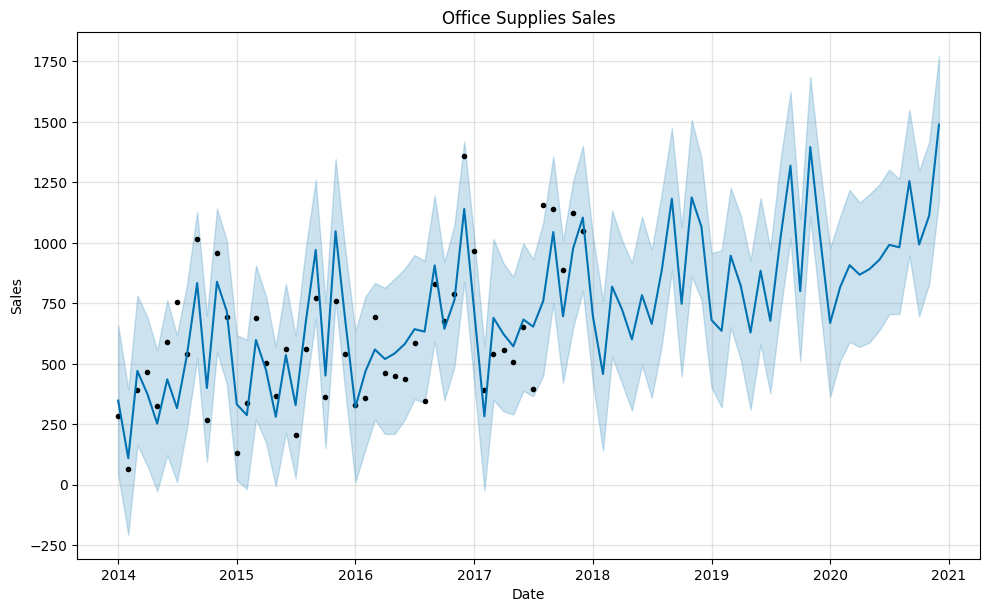

In [87]:
plt.figure(figsize=(18, 6))
office_supplies_model.plot(office_supplies_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

<Figure size 1800x600 with 0 Axes>

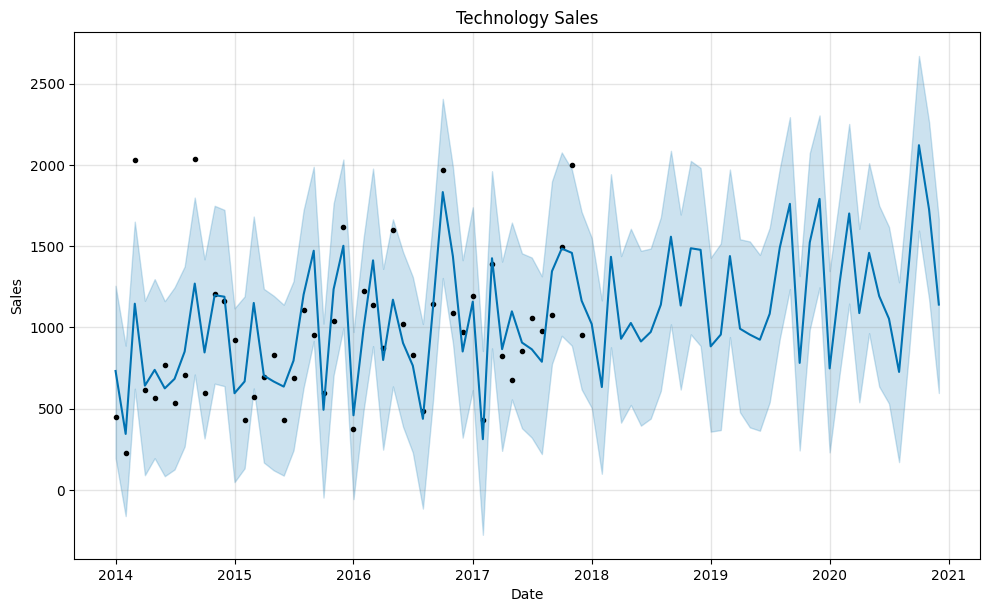

In [88]:
plt.figure(figsize=(18, 6))
technology_model.plot(technology_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Technology Sales');

Compare

In [89]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_supplies_names = ['office_supplies_%s' % column for column in office_supplies_forecast.columns]
technology_names = ['technology_%s' % column for column in technology_forecast.columns]

merge_furniture_forecast = furniture_forecast.copy()
merge_office_supplies_forecast = office_supplies_forecast.copy()
merge_technology_forecast = technology_forecast.copy()

merge_furniture_forecast.columns = furniture_names
merge_office_supplies_forecast.columns = office_supplies_names
merge_technology_forecast.columns = technology_names

forecast = pd.merge(merge_furniture_forecast, merge_office_supplies_forecast, how='inner', left_on='furniture_ds', right_on='office_supplies_ds')
forecast = pd.merge(forecast, merge_technology_forecast, how='inner', left_on='furniture_ds', right_on='technology_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop(['office_supplies_ds', 'technology_ds'], axis=1)
forecast.head()


,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,technology_additive_terms,technology_additive_terms_lower,technology_additive_terms_upper,technology_yearly,technology_yearly_lower,technology_yearly_upper,technology_multiplicative_terms,technology_multiplicative_terms_lower,technology_multiplicative_terms_upper,technology_yhat
0,2014-01-01,726.058109,294.449476,786.498342,726.058109,726.058109,-190.686099,-190.686099,-190.686099,-190.686099,...,-220.563518,-220.563518,-220.563518,-220.563518,-220.563518,-220.563518,0.0,0.0,0.0,731.791382
1,2014-02-01,727.494421,221.101818,684.227135,727.494421,727.494421,-276.379157,-276.379157,-276.379157,-276.379157,...,-613.862382,-613.862382,-613.862382,-613.862382,-613.862382,-613.862382,0.0,0.0,0.0,344.613664
2,2014-03-01,728.791734,453.328241,940.132771,728.791734,728.791734,-22.388253,-22.388253,-22.388253,-22.388253,...,181.796373,181.796373,181.796373,181.796373,181.796373,181.796373,0.0,0.0,0.0,1145.801199
3,2014-04-01,730.228046,395.232241,872.893829,730.228046,730.228046,-100.140909,-100.140909,-100.140909,-100.140909,...,-328.518998,-328.518998,-328.518998,-328.518998,-328.518998,-328.518998,0.0,0.0,0.0,641.606975
4,2014-05-01,731.618025,340.196481,801.348944,731.618025,731.618025,-160.818882,-160.818882,-160.818882,-160.818882,...,-237.337621,-237.337621,-237.337621,-237.337621,-237.337621,-237.337621,0.0,0.0,0.0,738.712044


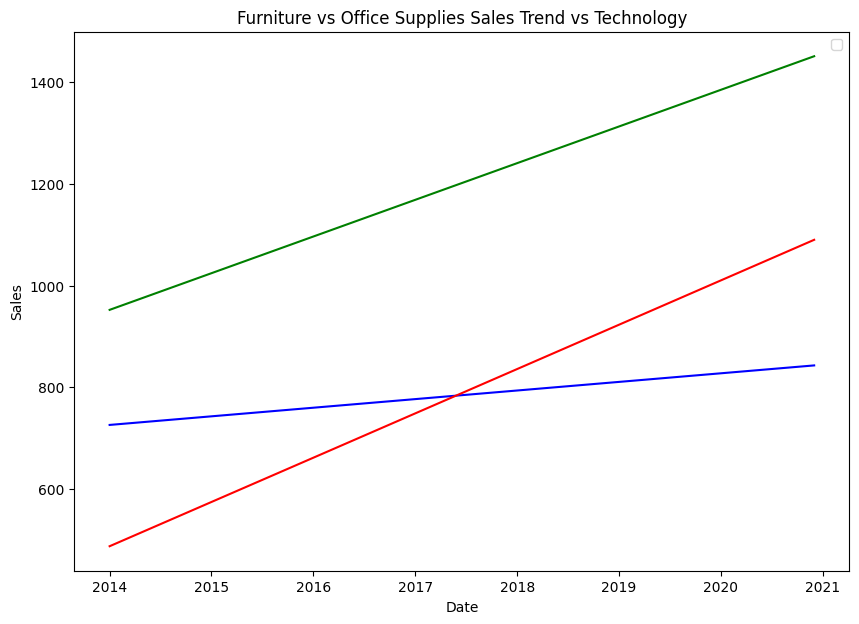

In [90]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_supplies_trend'], 'r-')
plt.plot(forecast['Date'], forecast['technology_trend'], 'g-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies Sales Trend vs Technology');

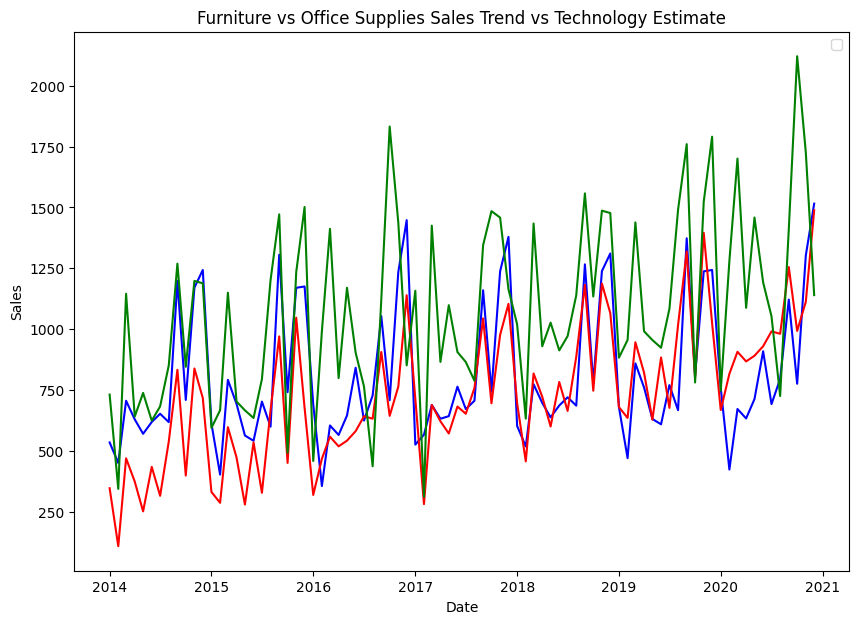

In [91]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_supplies_yhat'], 'r-')
plt.plot(forecast['Date'], forecast['technology_yhat'], 'g-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies Sales Trend vs Technology Estimate');

Inspect different trends of these three categories

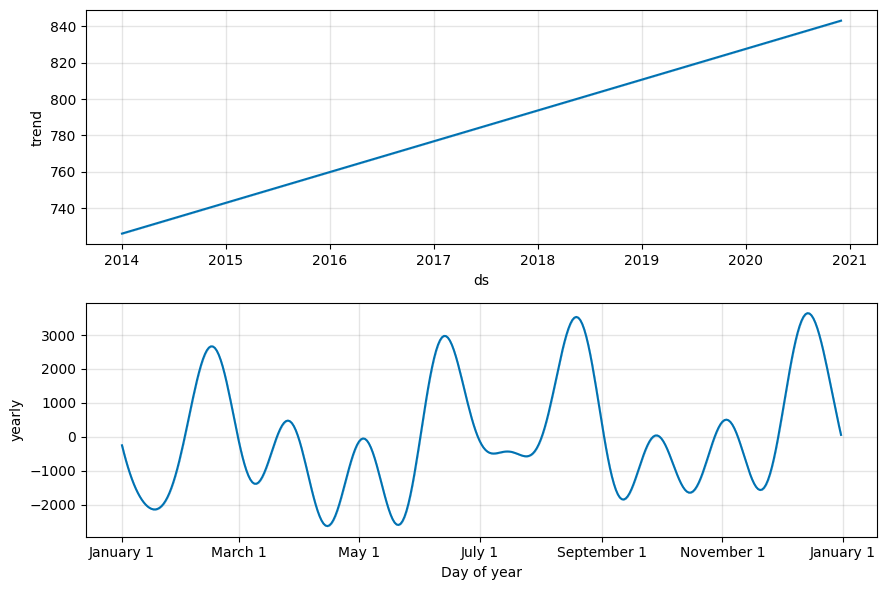

In [92]:
furniture_model.plot_components(furniture_forecast);

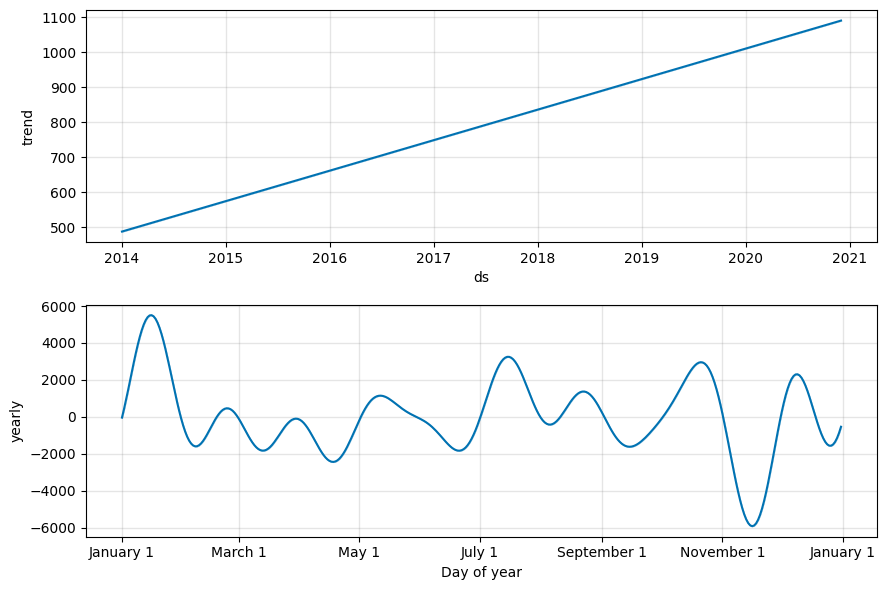

In [93]:
office_supplies_model.plot_components(office_supplies_forecast);

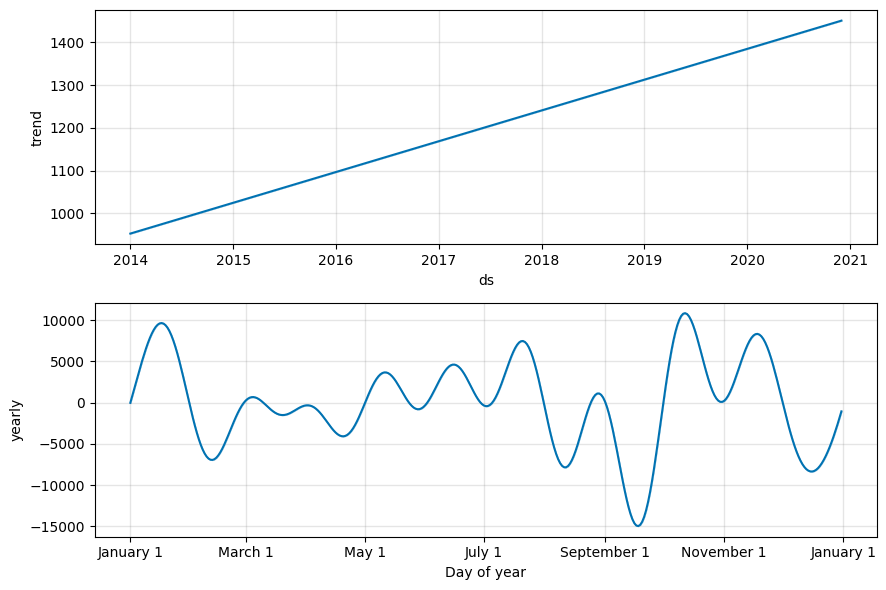

In [94]:
technology_model.plot_components(technology_forecast);

Model Evaluation

In [95]:
from sklearn.metrics import mean_absolute_error

furniture_actual = furniture['y']
furniture_predicted = furniture_model.predict(furniture)
furniture_predicted = furniture_predicted['yhat'].tail(len(furniture_actual))
furniture_mae = mean_absolute_error(furniture_actual, furniture_predicted)

office_supplies_actual = office_supplies['y']
office_supplies_predicted = office_supplies_model.predict(office_supplies)
office_supplies_predicted = office_supplies_predicted['yhat'].tail(len(office_supplies_actual))
office_supplies_mae = mean_absolute_error(office_supplies_actual, office_supplies_predicted)

technology_actual = technology['y']
technology_predicted = technology_model.predict(technology)
technology_predicted = technology_predicted['yhat'].tail(len(technology_actual))
technology_mae = mean_absolute_error(technology_actual, technology_predicted)

print("Mean Absolute Error (MAE) - Furniture: ", furniture_mae)
print("Mean Absolute Error (MAE) - Office Supplies: ", office_supplies_mae)
print("Mean Absolute Error (MAE) - Technology: ", technology_mae)


Mean Absolute Error (MAE) - Furniture:  98.36656457243011
Mean Absolute Error (MAE) - Office Supplies:  122.8272301803272
Mean Absolute Error (MAE) - Technology:  201.9947601866797


In [96]:
from sklearn.metrics import mean_squared_error
import numpy as np


furniture_rmse = np.sqrt(mean_squared_error(furniture_actual, furniture_predicted))
office_supplies_rmse = np.sqrt(mean_squared_error(office_supplies_actual, office_supplies_predicted))
technology_rmse = np.sqrt(mean_squared_error(technology_actual, technology_predicted))

print("Root Mean Squared Error (RMSE) - Furniture: ", furniture_rmse)
print("Root Mean Squared Error (RMSE) - Office Supplies: ", office_supplies_rmse)
print("Root Mean Squared Error (RMSE) - Technology: ", technology_rmse)


Root Mean Squared Error (RMSE) - Furniture:  122.33550536711792
Root Mean Squared Error (RMSE) - Office Supplies:  154.98179650072564
Root Mean Squared Error (RMSE) - Technology:  278.6158799770729


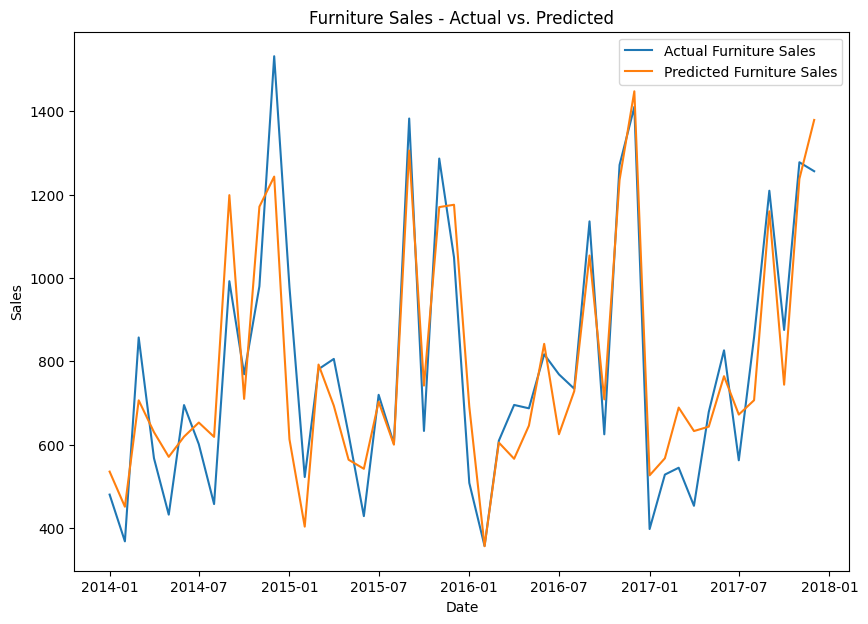

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(furniture['ds'], furniture_actual, label='Actual Furniture Sales')
plt.plot(furniture['ds'], furniture_predicted, label='Predicted Furniture Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture Sales - Actual vs. Predicted')
plt.legend()
plt.show()

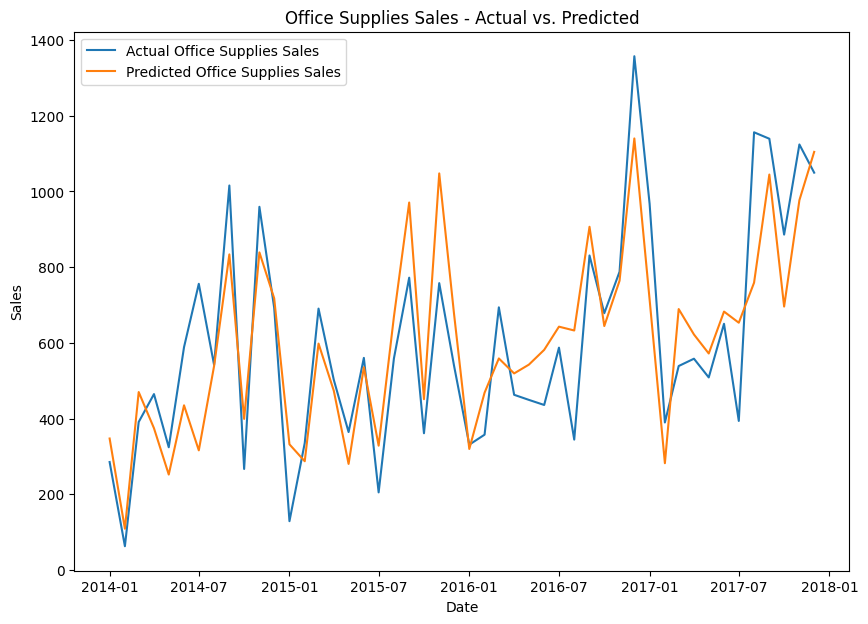

In [98]:
plt.figure(figsize=(10, 7))
plt.plot(office_supplies['ds'], office_supplies_actual, label='Actual Office Supplies Sales')
plt.plot(office_supplies['ds'], office_supplies_predicted, label='Predicted Office Supplies Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Office Supplies Sales - Actual vs. Predicted')
plt.legend()
plt.show()

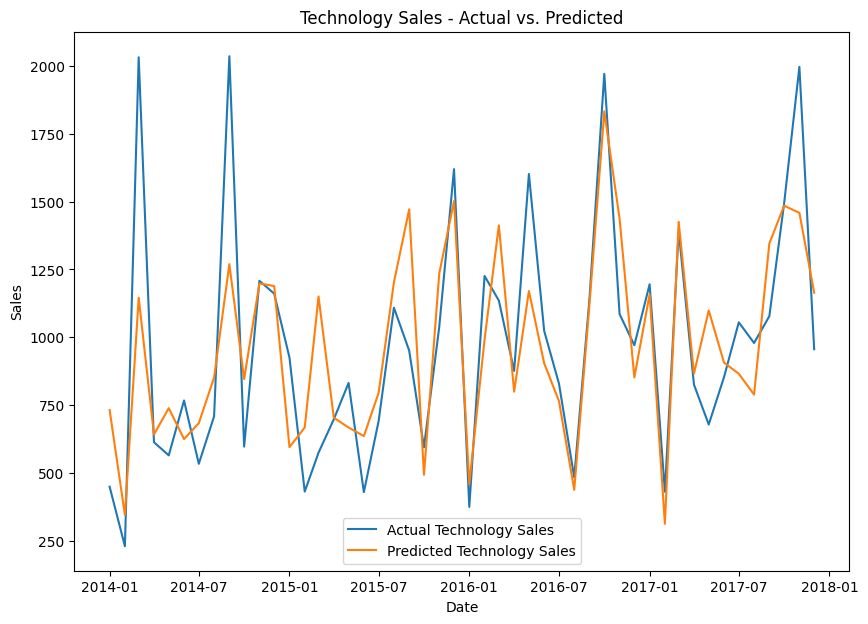

In [99]:
plt.figure(figsize=(10, 7))
plt.plot(technology['ds'], technology_actual, label='Actual Technology Sales')
plt.plot(technology['ds'], technology_predicted, label='Predicted Technology Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Technology Sales - Actual vs. Predicted')
plt.legend()
plt.show()